In [1]:
import os
import json
import re
import glob
from collections import defaultdict

import numpy as np
from sklearn.metrics import precision_score, recall_score
import matplotlib.pyplot as plt

In [2]:
results_json = json.load(open('/home/Nele/code/ct_classifier_zoops/runs/Jan19_21-30-00_cv4e-2026-student4/val_predictions/val_predictions_epoch_00200.json'))
results_json.keys()
gt = results_json['labels']
predictions = results_json['predictions']
labels = np.unique(gt)
labels.sort()
precision = precision_score(gt, predictions, labels=labels, average=None, zero_division=0)
recall = recall_score(gt, predictions, labels=labels, average=None, zero_division=0)


Text(0.5, 0, 'class label')

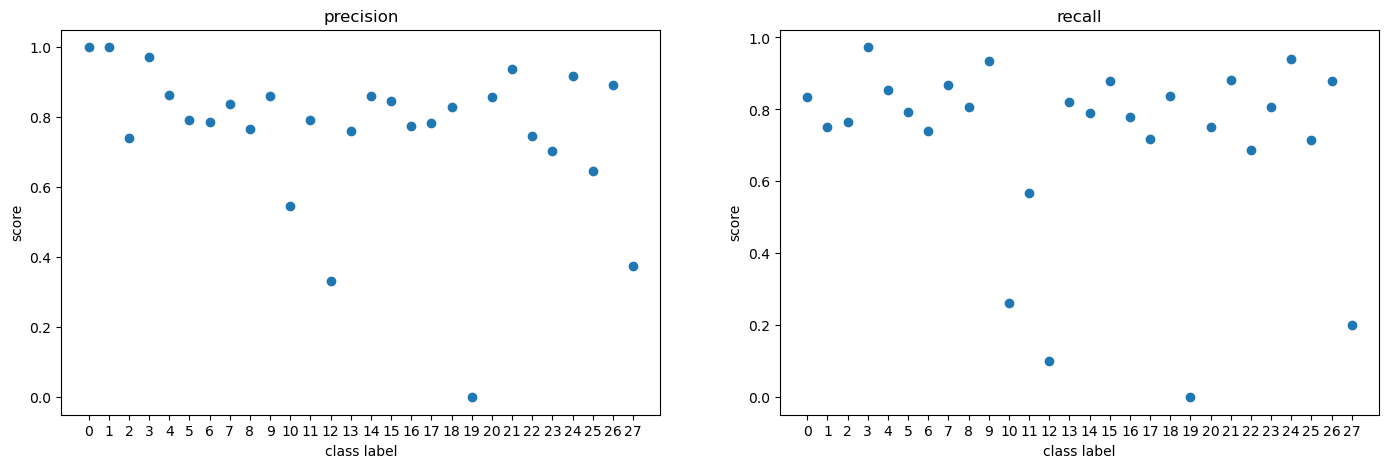

In [10]:
plt.figure(figsize=(17,5))
plt.subplot(1,2,1) 
plt.scatter(labels,precision,label='precision')
plt.xticks(labels)
plt.title('precision')
plt.ylabel('score')
plt.xlabel('class label')
plt.subplot(1,2,2)
plt.scatter(labels,recall,label='recall')
plt.xticks(labels)
plt.title('recall')
plt.ylabel('score')
plt.xlabel('class label')

Text(0.5, 0, 'class label')

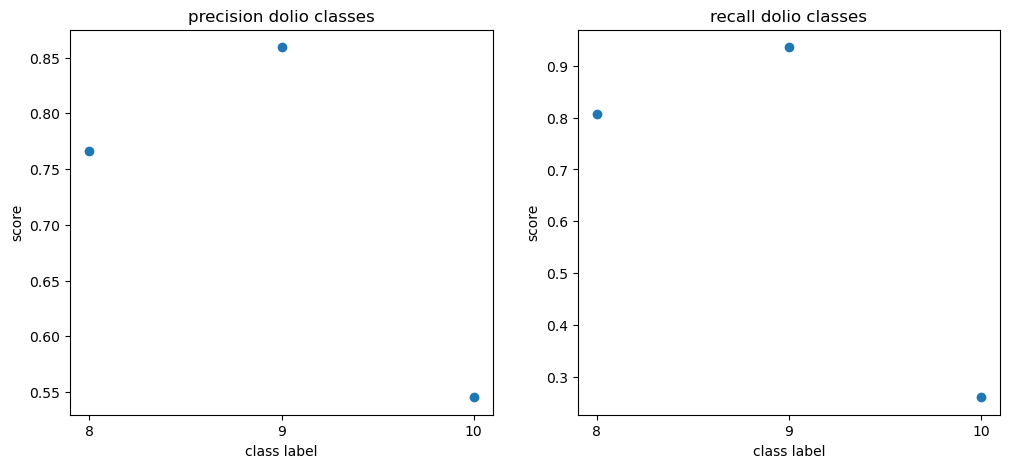

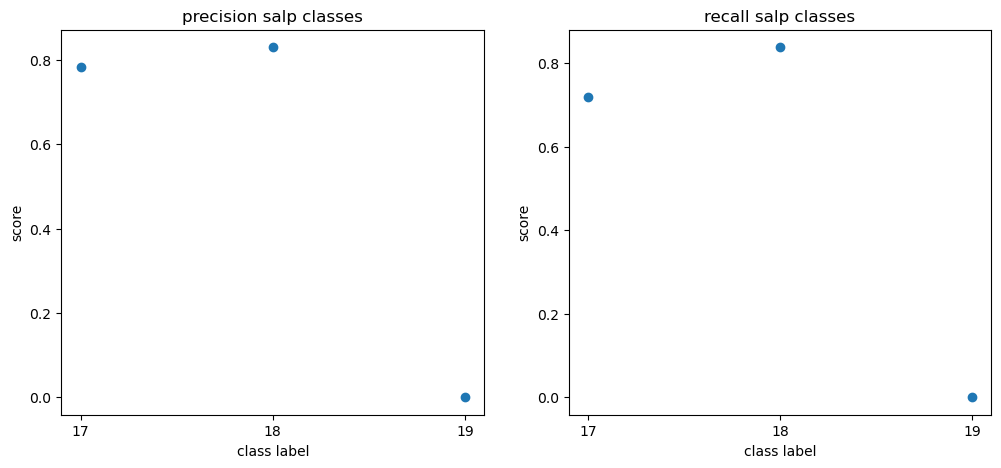

In [14]:
# # look at classes 
#     "dolio": 8,
#     "dolnurse": 9,
#     "dolphor": 10,
# separately

plt.figure(figsize=(12,5))
plt.subplot(1,2,1) 
plt.scatter([8,9,10],precision[[8,9,10]],label='precision')
plt.xticks([8,9,10])
plt.title('precision dolio classes')
plt.ylabel('score')
plt.xlabel('class label')
plt.subplot(1,2,2)
plt.scatter([8,9,10],recall[[8,9,10]],label='recall')
plt.xticks([8,9,10])
plt.title('recall dolio classes')
plt.ylabel('score')
plt.xlabel('class label')

# # look at classes 
#     "salp": 17,
#     "salpchain": 18,
#     "salpring": 19,
# separately

plt.figure(figsize=(12,5))
plt.subplot(1,2,1) 
plt.scatter([17,18,19],precision[[17,18,19]],label='precision')
plt.xticks([17,18,19])
plt.title('precision salp classes')
plt.ylabel('score')
plt.xlabel('class label')
plt.subplot(1,2,2)
plt.scatter([17,18,19],recall[[17,18,19]],label='recall')
plt.xticks([17,18,19])
plt.title('recall salp classes')
plt.ylabel('score')
plt.xlabel('class label')
    